Evolution des quantitées de matière lors d'un titrage conductimétrique
=========================================================

In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def v_eq(acide, base):
    """
    renvoie le volume de solution titrante versé à l'équivalence
    dans le cas du titrage d'un acide par une base.
    acide, base: couple (c, V) concentration, volume
    """
    return round((acide[0] / base[0]) * acide[1] , 4)

In [3]:
acide = (0.136, 10.0e-3)
base = (0.10,)
print(v_eq(acide, base))

0.0136


Réaction support:  

$AH_{(aq)} + HO^{-}_{(aq} \longrightarrow A^{-}_{(aq)} + H_2O_{(l)}$ 

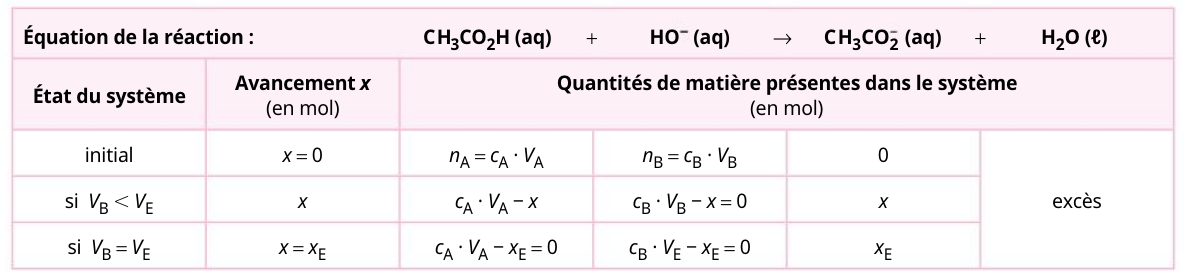

In [4]:
def qte_matiere(ah, b, vmax=0.025):
    """
    Calcule et renvoie les quantités de matières du système et les volumes
    de solution titrante compris entre 0 et vmax pour la transformation
    AH + HO- --> A- + H2O
    ah: tuple de propriété de l'acide (c, V), c et V étant des décimaux représentant
    la concentration et le volume respectivement
    b: tuple de propriété de la base (solution titrante)
    vmax: volume maximum de la burette
    """
    v_equiv = v_eq(ah, b) # 
    volume_verse = np.linspace(0, vmax, 50) # construction du tableau des volumes (50 pts ici)
    # Pour les expressions des quantités, consulter le tableau d'avancement
    n_AH = [ah[0] * ah[1] - vb * b[0] if vb <= v_equiv else 0 for vb in volume_verse]
    n_HO = [0 if vb <= v_equiv else b[0] * (vb - v_equiv) for vb in volume_verse]
    n_Amoins = [b[0] * vb if vb <= v_equiv else b[0] * v_equiv for vb in volume_verse]
    return np.array(volume_verse), np.array(n_AH), np.array(n_HO), np.array(n_Amoins)
            

### Commentaires du code

La ligne 14   

```python
n_AH = [ah[0] * ah[1] - vb * b[0] if vb <= v_equiv else 0 for vb in volume_verse]
```

correspond à la construction du tableau des quantités de matières d'acide éthanoïque. D'après la documentation de la fonction `ah` est un couple (c, V). `ah[0]` correspond à $c_A$ et `ah[1]` correspond à $V_A$. De ce fait, cette ligne montre qu'on calcule la quantité de matière d'acide en effectuant $c_A\cdot V_A - c_B\cdot v_B$ jusqu'à l'équivalence. Après l'équivalence, la quantité d'acide est évidemment nulle.  

On construit $n_{HO^{-}}$ et $n_{A^{-}}$ de la même manière (lignes 15 et 16):  

* $n_{HO^{-}}=0$ jusqu'à l'équivalence puis augmente $n_{HO^{-}}=c_B\cdot(V_B-V_{eq})$ jusqu'à `vmax`;
* $n_{A^{-}}=c_B\cdot V_B$ jusqu'à l'équivalence puis reste constante.

### Tests

on veut suivre l'évolution des quantités de matière lors d'un titrage (*celui du TP du 2/09*). Les caractéristiques sont les suivantes:  
* Acide éthanoïque $c_A=0.136\ \mathrm{mol\cdot L^{-1}}$ et $V_A=10,0\ \mathrm{mL}$;
* Hydroxyde de sodium $c_B=0.10\ \mathrm{mol\cdot L^{-1}}$

In [5]:
# Calcul des quantités de matière

acide = (0.136, 10.0e-3)
base = (0.10,)
v, ah, ho, amoins = qte_matiere(acide, base)

In [6]:
def tracer_n(ax, v, ah, ho, amoins):
    """
    Effectue le tracé des quantités de matières ah, ho et amoins
    en fonction de v (volume de solution titrante versé)
    v, ah, ho, amoins: tableaux qui contiennent le volume et les qte de matières respectivement
    ax: variable de type 'Axes' de matplotlib
    """
    ax.plot(v, ah, '-g', label='$n_{AH}$')
    ax.plot(v, ho, '--r', label='$n_{HO^{-}}$')
    ax.plot(v, amoins, ':b', label='$n_{A^{-}}$')

    ax.legend()
    ax.set_title('Evolution des quantites de matiere')
    ax.set_xlabel('Volume versé (L)')
    ax.set_ylabel('Quantité de matière (mol)')
    ax.grid()


In [7]:
fig1, ax1 = plt.subplots()
tracer_n(ax1, v, ah, ho, amoins)
fig1.show()

## Travail à effectuer: simulation du titrage d'un vinaigre à 6°

On réalise le titrage d'un volume $V_A=20,0\ \mathrm{mL}$ d'un vinaigre dilué au 1/10 avec une solution d'hydroxyde de sodium de concentration $c_B=0,20\ \mathrm{mol\cdot L^{-1}}$.  

Trouver le volume de solution titrante versé à l'équivalence. Afficher l'évolution des quantités de matière.

## Evolution de la conductivité

In [8]:
# Constantes: conductivité molaire ionique
LAMBDA_Na = 5.0
LAMBDA_HO = 20.0
LAMBDA_Amoins = 4.1
V_EAU_AJOUTE = 300e-3

def conductivite(vb_verse, cb, n_ho, n_amoins):
    """
    """
    # n_Na+ = cb * Vb_versé
    n_Na = np.array([cb * v for v in vb_verse])
    sigma = (LAMBDA_Na * n_Na + LAMBDA_HO * n_ho + LAMBDA_Amoins * n_amoins) / (V_EAU_AJOUTE + vb_verse)
    return sigma

In [9]:
acide = (0.136, 10.0e-3)
base = (0.10,)
v, ah, ho, amoins = qte_matiere(acide, base)
sigma = conductivite(v, base[0], ho, amoins)

def trace_sigma(ax, v, sigma):
    """
    Effectue le tracé de la conductivité en fonction du volume versé
    """
    ax.plot(v, sigma, '-r', label='$\sigma$')
    ax.legend()
    ax.set_title('Evolution de la conductivité')
    ax.set_xlabel('Volume versé (L)')
    ax.set_ylabel('Conductivite ($mS\cdot cm^{-1}$)')
    ax.grid()

In [10]:
fig2, ax2 = plt.subplots()
trace_sigma(ax2, v, sigma)
fig2.show()

## Travail à effectuer

* Déterminer le volume de solution titrante versé à l'équivalence.
* En utilisant le code, indiquer l'influence de l'eau ajouté.